In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd

from PIL import Image
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib
import random
import seaborn as sns

資料前處理

In [3]:
# 設定圖片大小
IMG_SIZE = 224
folder = '/content/drive/MyDrive/model/deep-learning-for-image-processing-master/pytorch_classification/Test6_mobilenet/data_set/flower_data/train'

# 讀取圖片，將其轉換為灰度並調整大小
def read_image(file_path):
    img = Image.open(file_path).convert('RGB')
    img = img.resize((IMG_SIZE, IMG_SIZE))
    return np.array(img)

# 讀取資料夾中的所有圖片，轉換為矩陣
def load_images_from_folder(folder):
    images, labels_number, labels_name  = [], [], []
    for label, folder_name in enumerate(os.listdir(folder)):
        label_folder = os.path.join(folder, folder_name)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                file_path = os.path.join(label_folder, filename)
                if os.path.isfile(file_path):
                    img = read_image(file_path)
                    images.append(img)
                    labels_number.append(label)
                    labels_name.append(folder_name)
    return np.array(images), np.array(labels_number), np.array(labels_name)

# 載入所有圖片
images, labels_number, labels_name = load_images_from_folder(folder)

images_rsp = images.reshape(images.shape[0], -1)

print('原始', images.shape)
print('轉換', images_rsp.shape)
print('\n標籤', labels_number)
print('名稱', labels_name)


原始 (2629, 224, 224, 3)
轉換 (2629, 150528)

標籤 [ 0  0  0 ... 26 26 26]
名稱 ['十二之卷' '十二之卷' '十二之卷' ... '雪兔-麗娜蓮' '雪兔-麗娜蓮' '雪兔-麗娜蓮']


In [14]:
os.listdir(folder)

['十二之卷',
 'Fiona',
 '京之華',
 '墨西哥雪球',
 '東雲',
 '千佛手',
 '吉娃蓮',
 '桃蛋',
 '實生百合',
 '姬朧月',
 '月耳兔',
 '沙漠玫瑰',
 '反葉石蓮',
 '錦司晃',
 '蜘蛛長生花',
 '火祭',
 '熊童子',
 '金琥石化',
 '銀之鈴',
 '觀音蓮卷絹',
 '白牡丹',
 '燦爛蓮花掌',
 '瑞雲仙人球',
 '鹿角海棠',
 '黛比',
 '雅樂之舞',
 '雪兔-麗娜蓮']

In [32]:
name, num = [], []

for label, folder_name in enumerate(os.listdir(folder)):
    label_folder = os.path.join(folder, folder_name)
    count = len(os.listdir(label_folder))
    name.append(folder_name)
    num.append(count)

In [41]:
df = pd.DataFrame([name, num]).T

df.columns = ['folder_name', 'count']

df.to_csv('./data.csv', index=False, encoding='utf-8')


隨機抽檢圖片

答案: 桃蛋


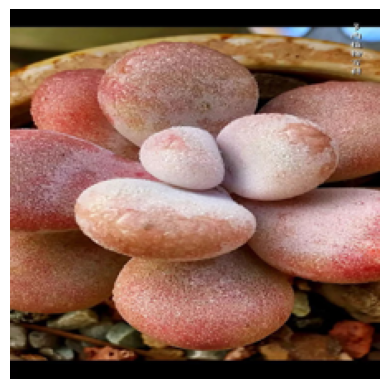

In [ ]:
%matplotlib inline

rd = random.randint(0, 2629)

print("答案:", labels_name[rd])

plt.axis('off')

plt.imshow(images[rd], cmap="gray");

PCA-2D繪圖

In [ ]:
# 進行PCA分析

x_pca = PCA(n_components=2).fit_transform(images_rsp)

# normalize
x_min, x_max = x_pca.min(0), x_pca.max(0)
x_norm = (x_pca - x_min) / (x_max - x_min)

x = pd.DataFrame(x_norm, columns=['p_x', 'p_y'])
y = pd.DataFrame(labels_name.reshape(labels_name.shape[0], -1), columns=['labels'])

pca_2_data = pd.concat([x, y], axis=1) 

# 下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')


--2023-05-05 04:55:10--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.187.138, 64.233.187.100, 64.233.187.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.187.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1lk00urgn8arb18pjg8jp30lbn9rfl57/1683262500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=2a52b316-8e84-429a-a1f9-9bbe5e3977b2 [following]
--2023-05-05 04:55:14--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1lk00urgn8arb18pjg8jp30lbn9rfl57/1683262500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=2a52b316-8e84-429a-a1f9-9bbe5e3977b2
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to doc-0k

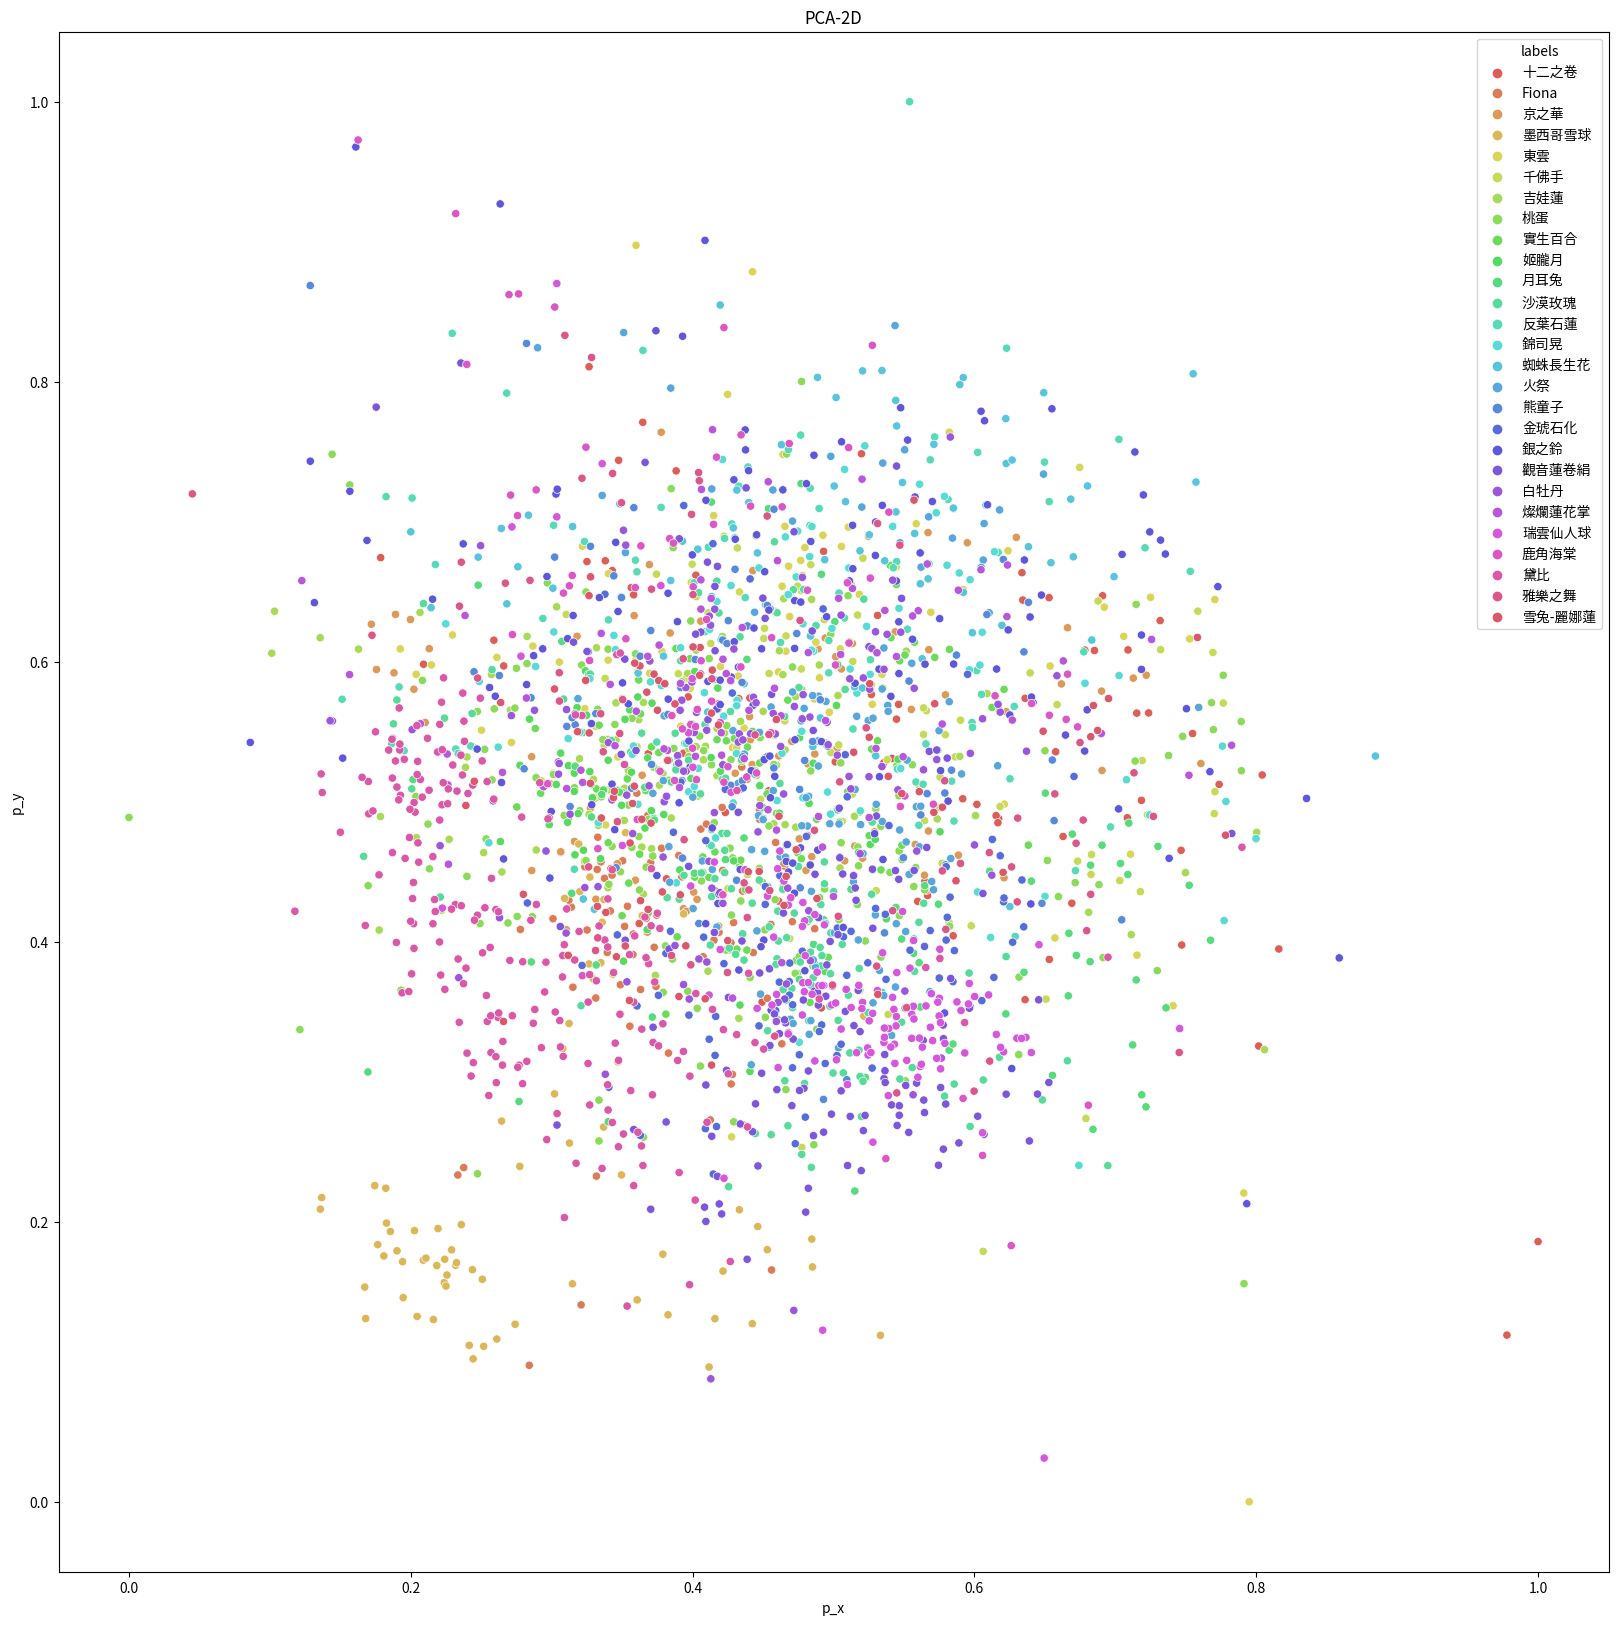

In [ ]:
plt.figure(figsize=(20, 20))
plt.title('PCA-2D')
sns.scatterplot(data=pca_2_data, x='p_x', y='p_y', hue="labels", palette=sns.color_palette("hls", len(os.listdir(folder))))
plt.show()

單種類低維分布

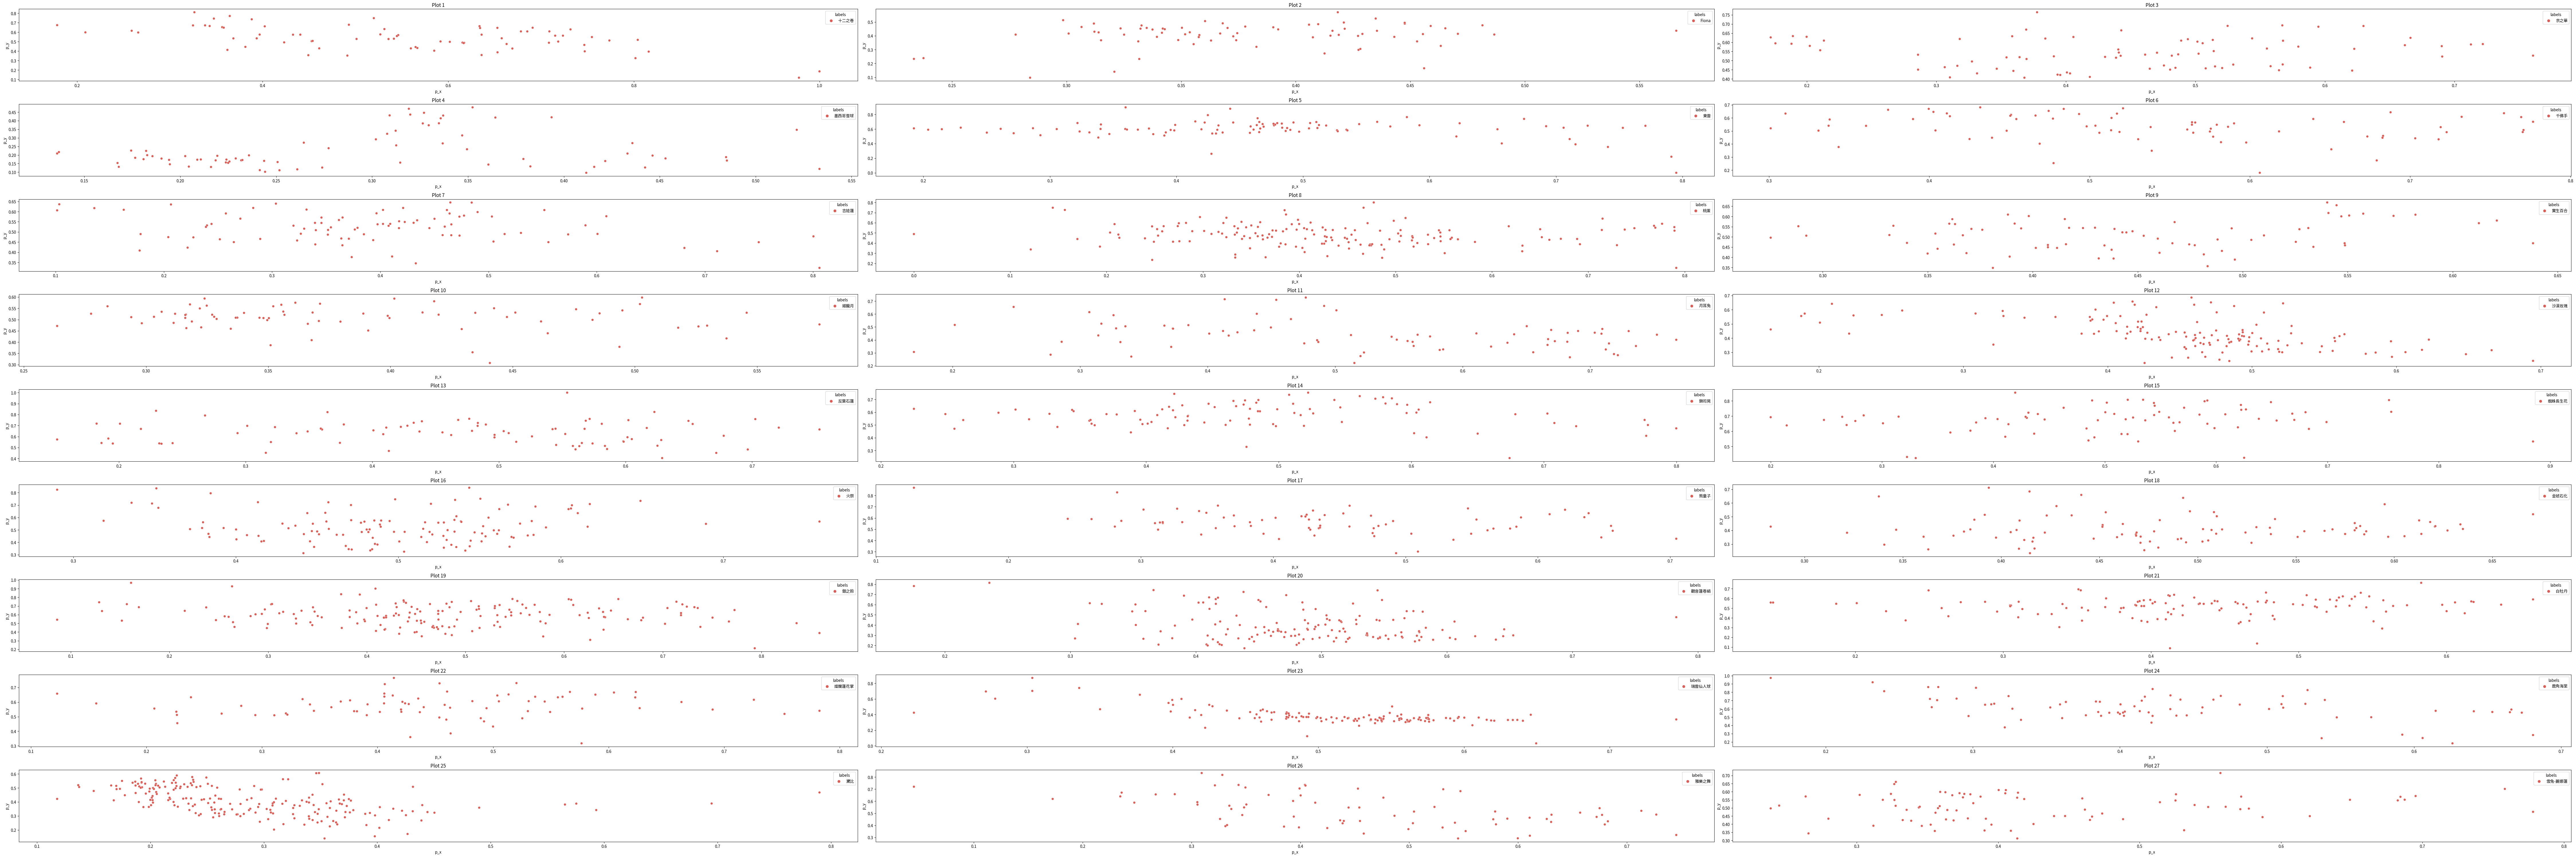

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# 設定圖片大小
fig = plt.figure(figsize=(90, 30))

# 調整子圖的佈局
gs = GridSpec(nrows=9, ncols=3, figure=fig)

for i in range(pca_2_data.nunique()['labels']):
  new_data = pca_2_data[labels_name == os.listdir(folder)[i]]

  # 將子圖放在大圖中
  ax = fig.add_subplot(gs[i])
  sns.scatterplot(data=new_data, x='p_x', y='p_y', hue="labels", 
                  palette=sns.color_palette("hls", new_data.nunique()['labels']), ax=ax)
  ax.set_title(f"Plot {i+1}")


# 調整間距並顯示圖片
plt.tight_layout()
plt.show()


TSNE-2D繪圖

In [ ]:
# %matplotlib inline 直接繪圖

import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2).fit_transform(images_rsp, labels_name)

x = pd.DataFrame(tsne, columns=['t_x', 't_y'])
y = pd.DataFrame(labels_name.reshape(labels_name.shape[0], -1), columns=['labels'])

tsne_2_data = pd.concat([x, y], axis=1)

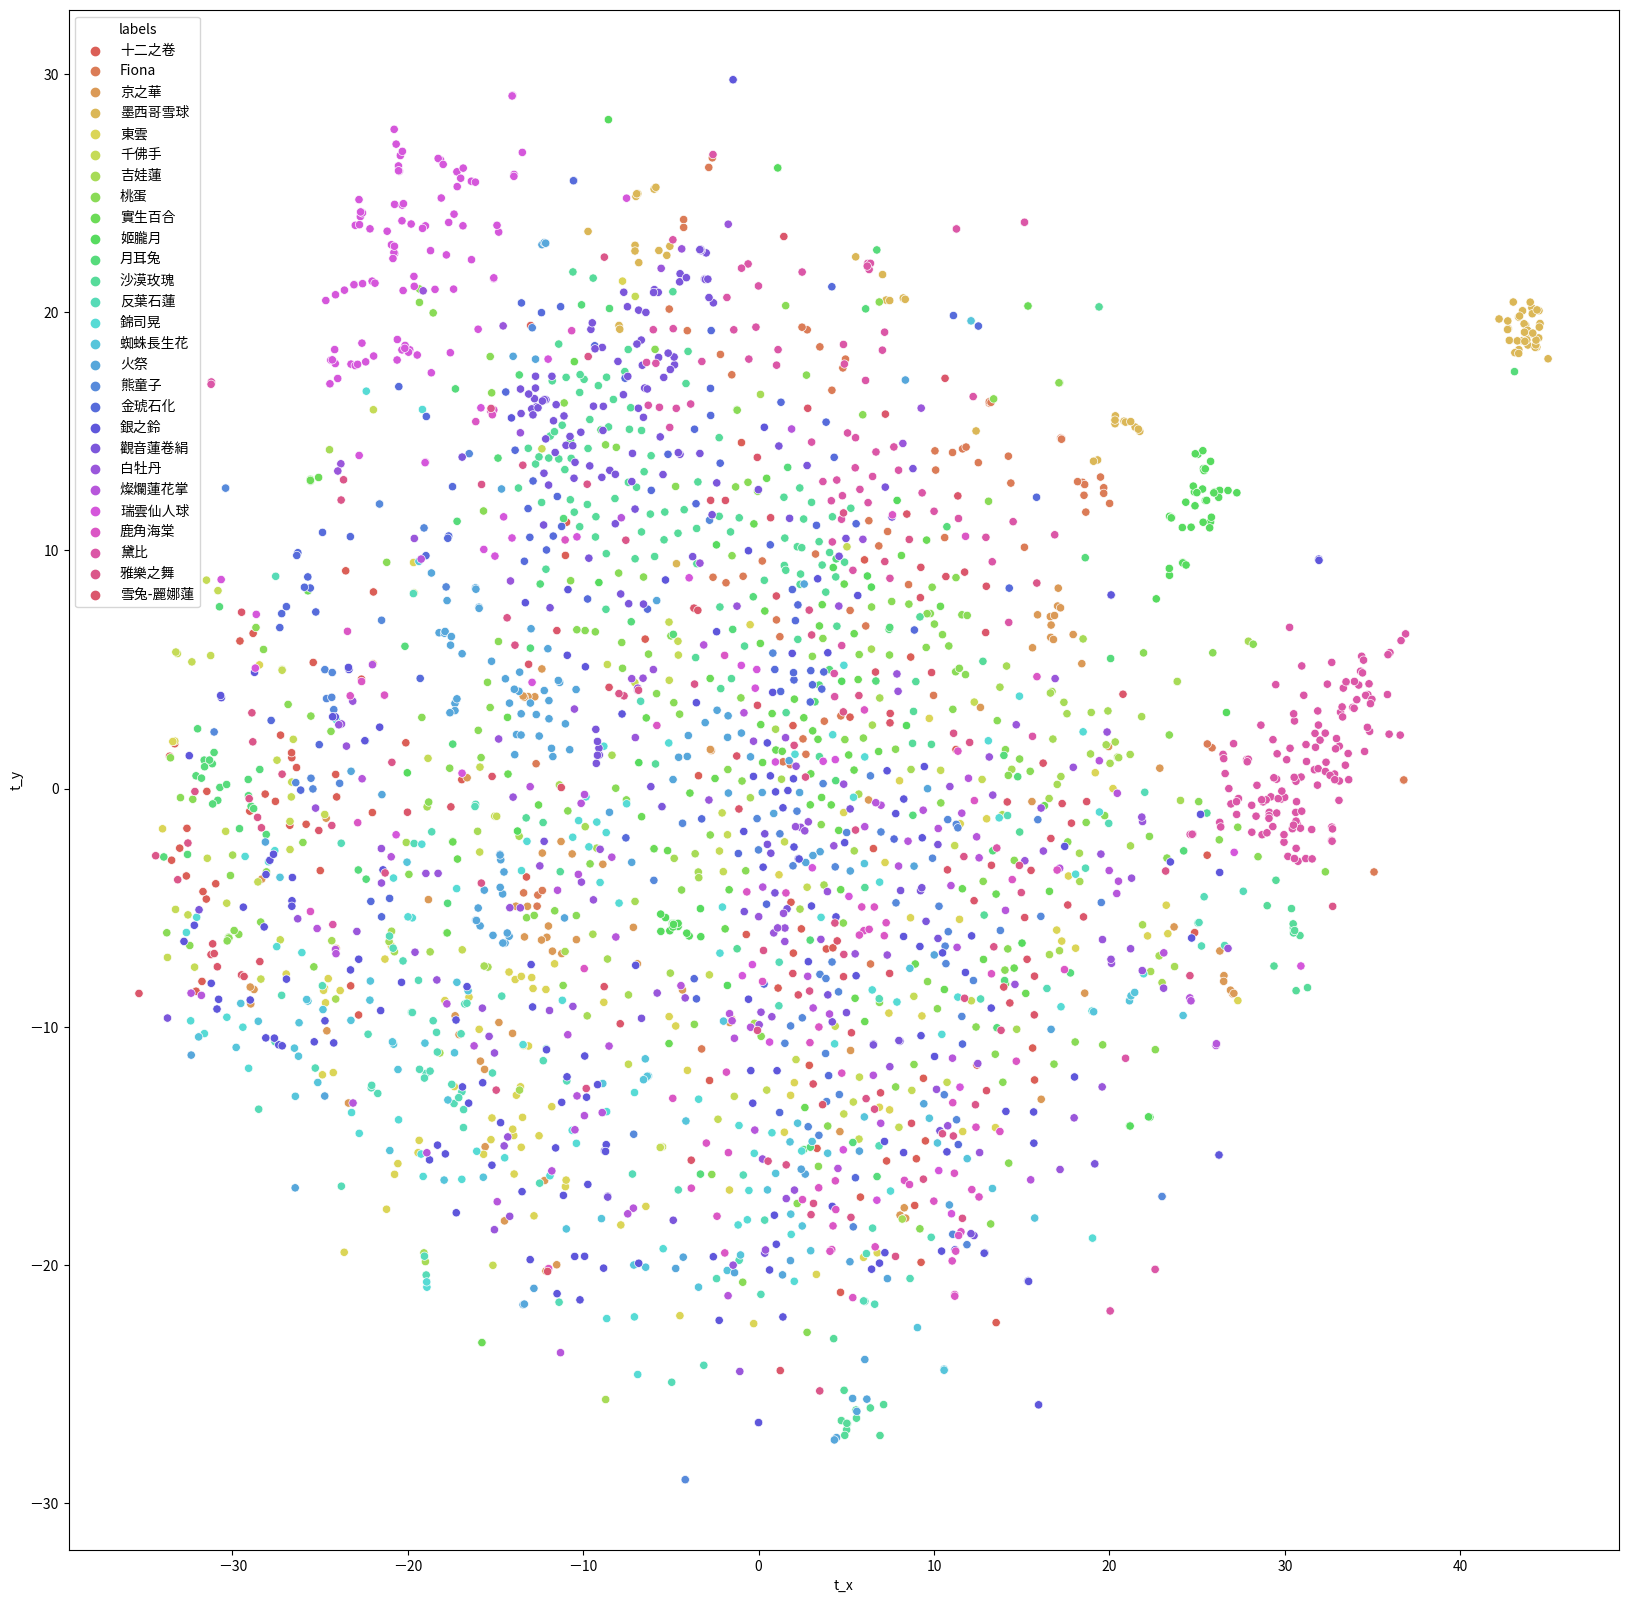

In [ ]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=tsne_2_data, x='t_x', y='t_y', hue="labels", palette=sns.color_palette("hls", len(os.listdir(folder))))
plt.show()

TSNE-3D繪圖

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3).fit_transform(images_rsp, labels_name)

x = np.array(tsne[:, 0])
y = np.array(tsne[:, 1])
z = np.array(tsne[:, 2])

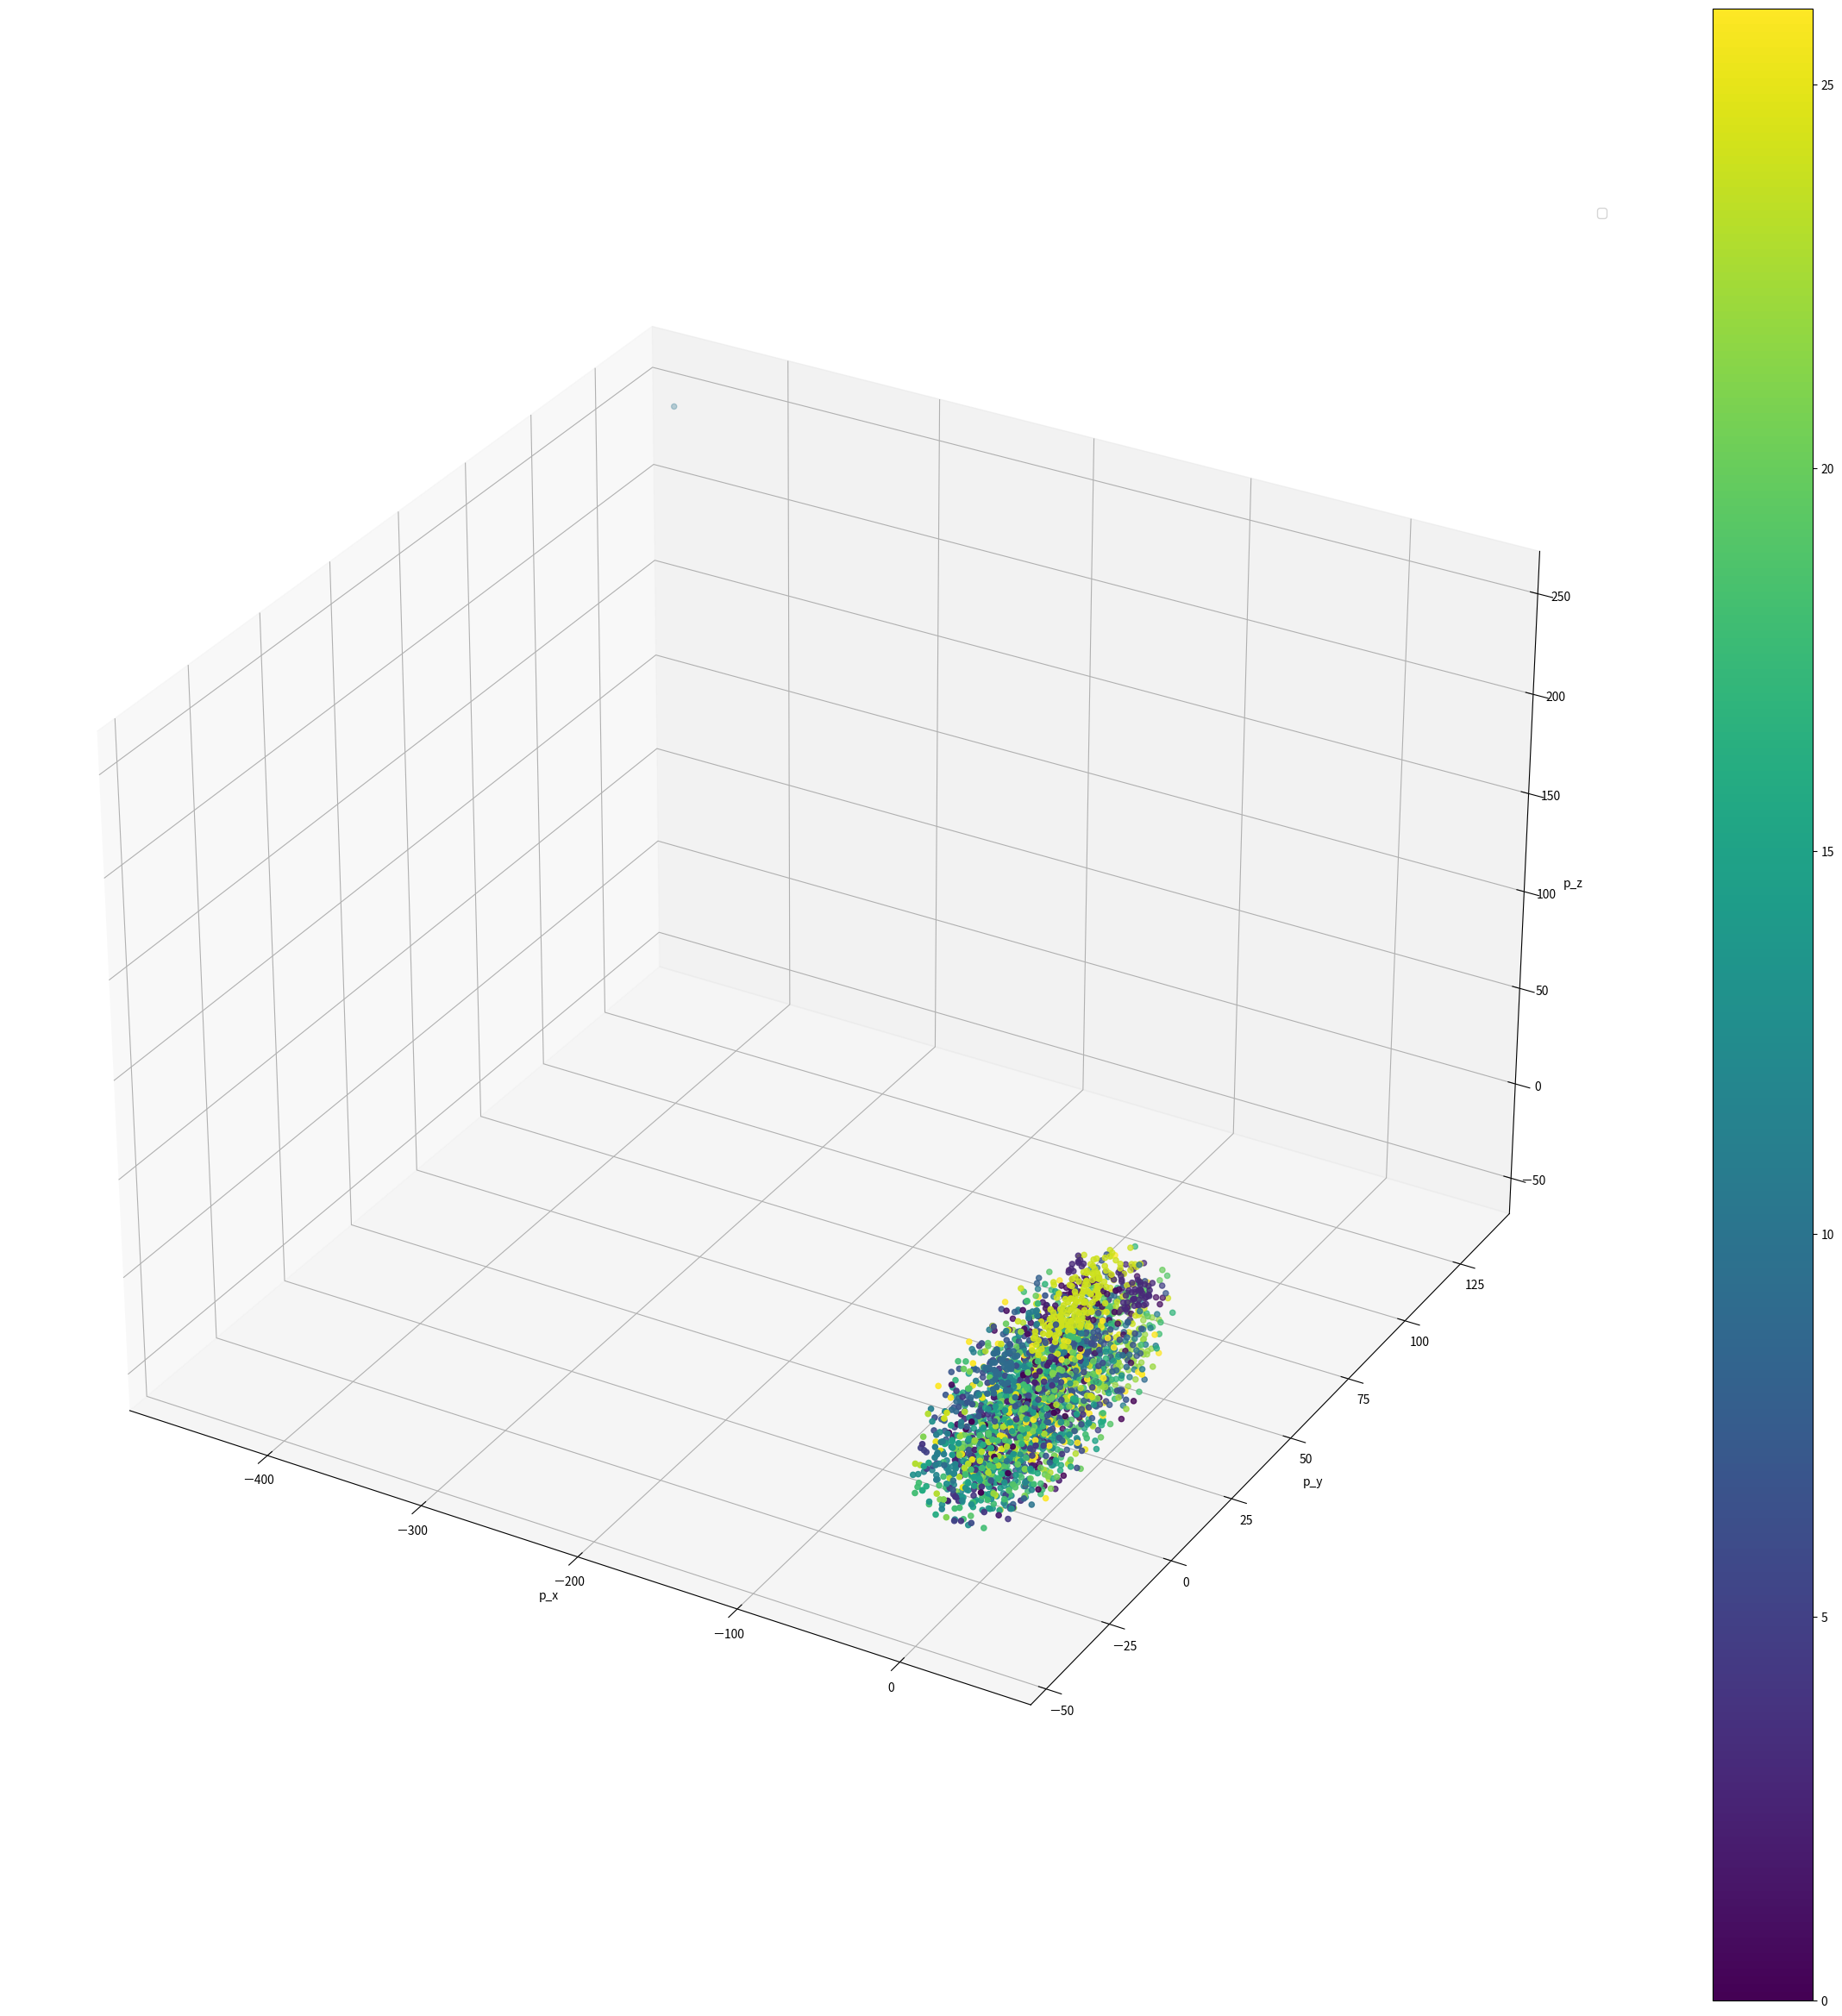

In [ ]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')

scatter = Axes3D.scatter(xs=x, ys=y, zs=z, c=labels_number,  ax=ax)

fig.colorbar(scatter)
    
ax.set_xlabel('p_x')
ax.set_ylabel('p_y')
ax.set_zlabel('p_z')
ax.legend(loc='best')

plt.show()